# Testing the t-shirt detector with Viola-Jones algorithm

The Viola-Jones algorithm detects object using Haar cascade classifiers. The original work can be found [here](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), and a good lesson on [Youtube](https://www.youtube.com/watch?v=WfdYYNamHZ8).

For the proposed approach , t-shirt detection is the first step. We'll consider the ROI (region of interest) obtained by the detector. Through this ROI we apply the CNN model to recognize the two class of this project. OM and PSG t-shirt.

**Test set**

The test set is composed by two other sets, positive set and negative set. The true set contains images with t-shirts. The false set contains images without t-shirts (**the test set was not uploaded into this repository**).

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir, path

## Setting paths and files

In [2]:
data_path = "Dataset/cascade/"
pos_set =  path.abspath(data_path + "test/pos") # path to the positive images
neg_set =  path.abspath(data_path + "test/neg") # path to the negative images
cascade = "tshirt_cascade.xml" # path to the cascade xml file

## Testing the Viola-Jones algorithm for T-shirt recognition

In [3]:
tshirt_cascade = cv2.CascadeClassifier(cascade) # loading the cascade file and defining the model 
                                                # for t-shirt recognition

### Positive images

A total of 20 images is considered for the test. Among them, there are 10 t-shirt of both teams. Note, this model does not label the classes.

In [4]:
pos_list = listdir(pos_set) # making a list with the posite images

In [5]:
# Defining the function to detect the images
def detect(gray, image):
    tshirt =  tshirt_cascade.detectMultiScale(gray, 3.5, 10, minSize=(50, 50)) # object to detect
    for (x, y, w, h) in tshirt:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2) # to print the ROI
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
    return image

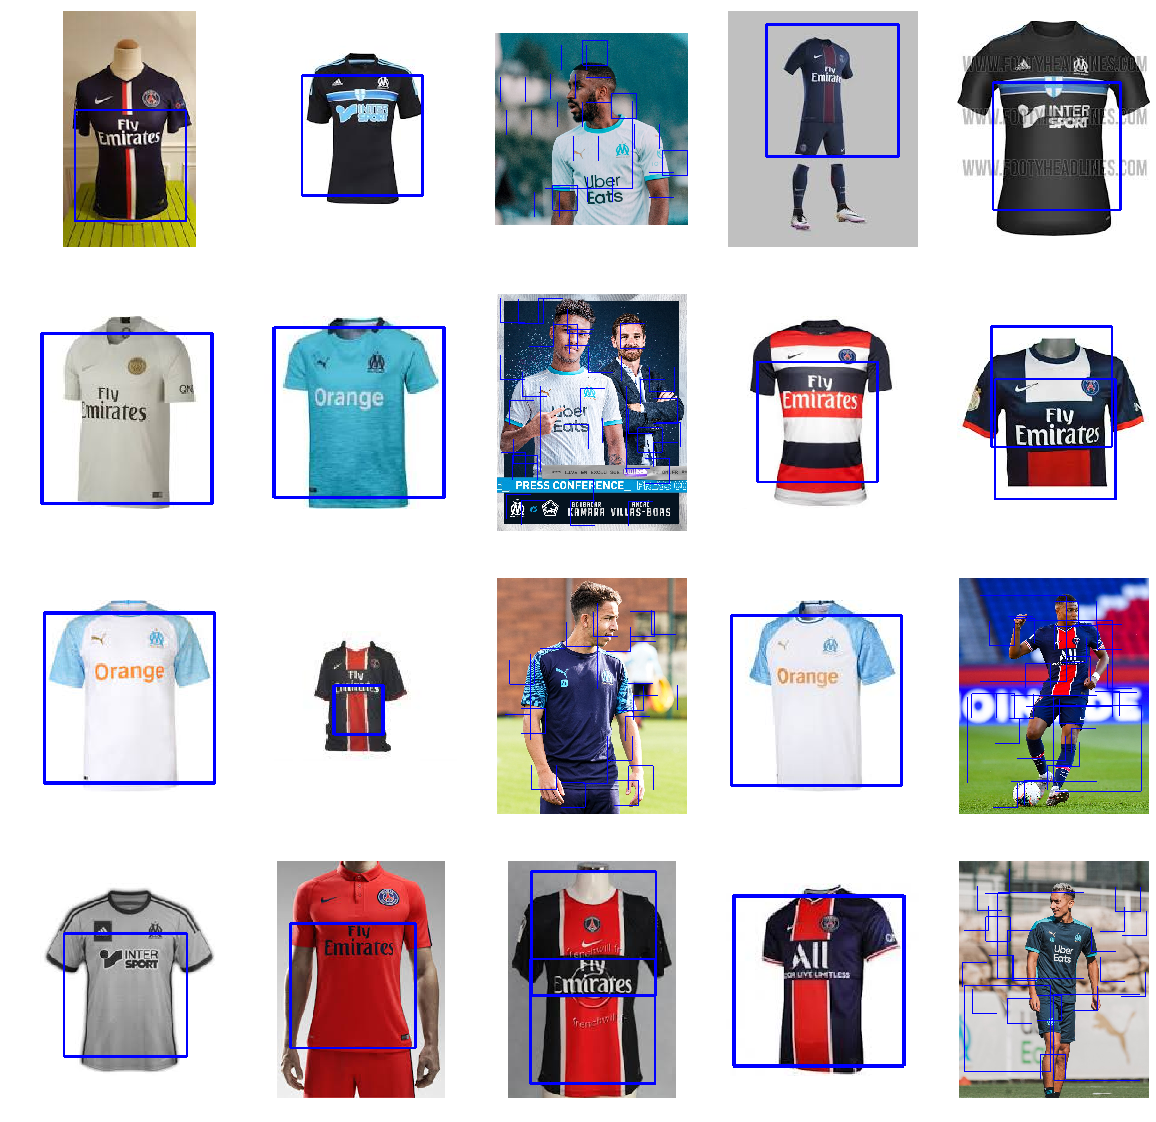

In [6]:
# Detecting on the positive image set 
count = 1
plt.figure(figsize=(20, 20))
for i in pos_list:
    img = pos_set + "/" + i # setting te image
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, image)
    ax = plt.subplot(4, 5, count)
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    count += 1
plt.show()   


### Negative images

Test the model with negative images in different backgrounds. With negative images, you can verify if the model detects many false positives.

In [7]:
neg_list = listdir(neg_set) # making a list with the posite images

We consider the same function to make prediction $detect(gray, image)$

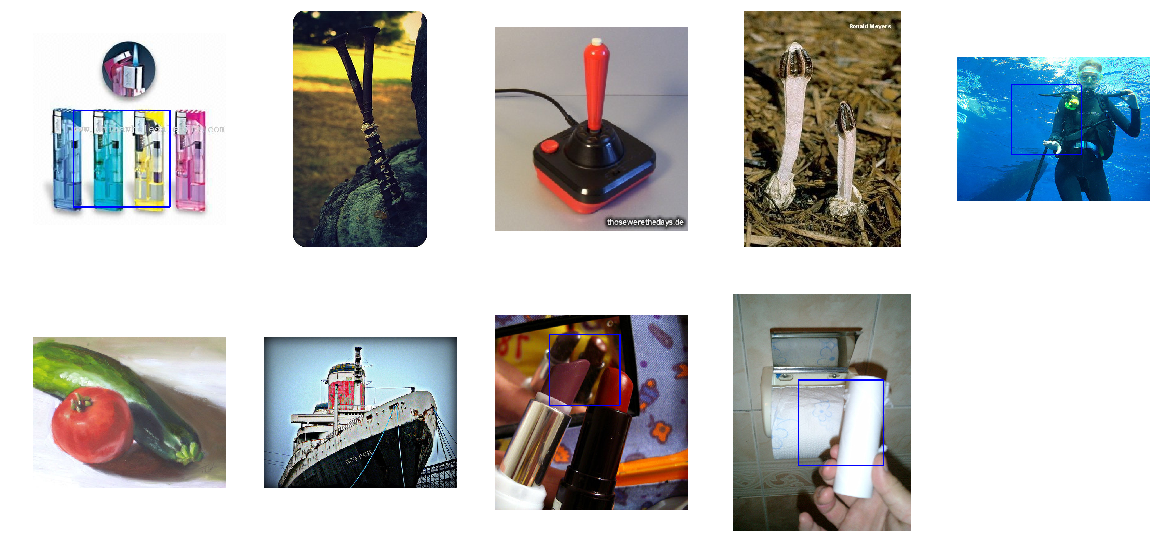

In [8]:
# Detecting on the positive image set 
count = 1
plt.figure(figsize=(20, 20))
for i in neg_list:
    img = neg_set + "/" + i # setting te image
    image = cv2.imread(img)
    gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray1, image)
    ax = plt.subplot(4, 5, count)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    count += 1
plt.show()   


## Conclusions

The Viola-Jones algorithm can produces good results when we have a good cascade classifier. The classifier trained for this task do not give good results. Even if, on the negative set we do not have many false positives, on the positive set, the false positive predictions are present, specially on the images with a complex background. To have more accurate detection, this classifier must be tuned. But the objective here is to train and, I share with you my experience. Maybe, in the future, I'll improve these results, for the moment, we'll stay here.